# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [4]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [5]:
df = pd.read_csv("movies.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

> Indented block



We can use the line

null_columns = df.columns[df.isnull().any()]

What this does is that it gives a list of column names which contain at least one null entry.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [7]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [8]:
df = df.dropna(subset=['overview']) # drop na values
df = df.reset_index(drop=True) # reset index

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [9]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    for i, unique_label in enumerate(unique_labels):
        if unique_label in label:
            out[i] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = encoded_labels

100%|██████████| 4800/4800 [00:00<00:00, 15452.32it/s]


Verify that one-hot encodings are indeed as expected

In [10]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

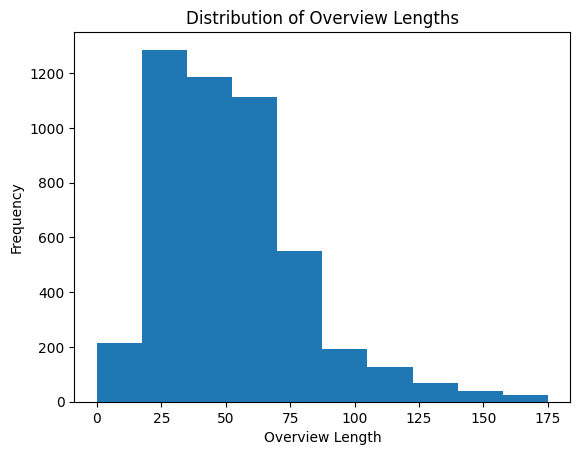

In [11]:
import re
import matplotlib.pyplot as plt

def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in df.iterrows():
    processed_overview = remove_punctuation(row["overview"]).lower()
    processed_overviews.append(processed_overview)

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = [len(overview.split()) for overview in df["proc_overview"]]

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens)
plt.xlabel('Overview Length')
plt.ylabel('Frequency')
plt.title('Distribution of Overview Lengths')
plt.show()


**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

Shortest overview has length 0 and the longest 175. I think the standard length should be 25 because this has the most frequency.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [12]:
token_len = 15  # number of words

# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x.split()[:token_len])

# Join the list of words back into a string
df["proc_overview"] = df["proc_overview"].apply(lambda x: ' '.join(x))

# print to verify
print(df)


                                         title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4794                                    Cavite   
4795                               El Mariachi   
4797                 Signed, Sealed, Delivered   
4798                          Shanghai Calling   
4799                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                          

### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [13]:
# Store all words for all movies in a set
all_words_set = set()

# Iterate through each overview and add words to the set
for overview in df["proc_overview"]:
    words = overview.split()
    all_words_set.update(words)

# Convert the set to a list and sort it
all_words_list = sorted(list(all_words_set))

# Find the length of the vocabulary
vocab_len = len(all_words_list)

# Print the length of the vocabulary
print("Length of the vocabulary:", vocab_len)


Length of the vocabulary: 12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [14]:
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = []  # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(encode_labels(word, all_words_list))  # get encoding for this word
    sentence_encode = np.sum(sentence_encode, axis=0)  # sum over axis=0
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
print(df['one_hot_overview'])  # print to verify


100%|██████████| 4707/4707 [05:33<00:00, 14.12it/s]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

Total bytes = Number of vectors * Length of each vector * Size of each float
= n * vocab_len * 16 bytes


# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

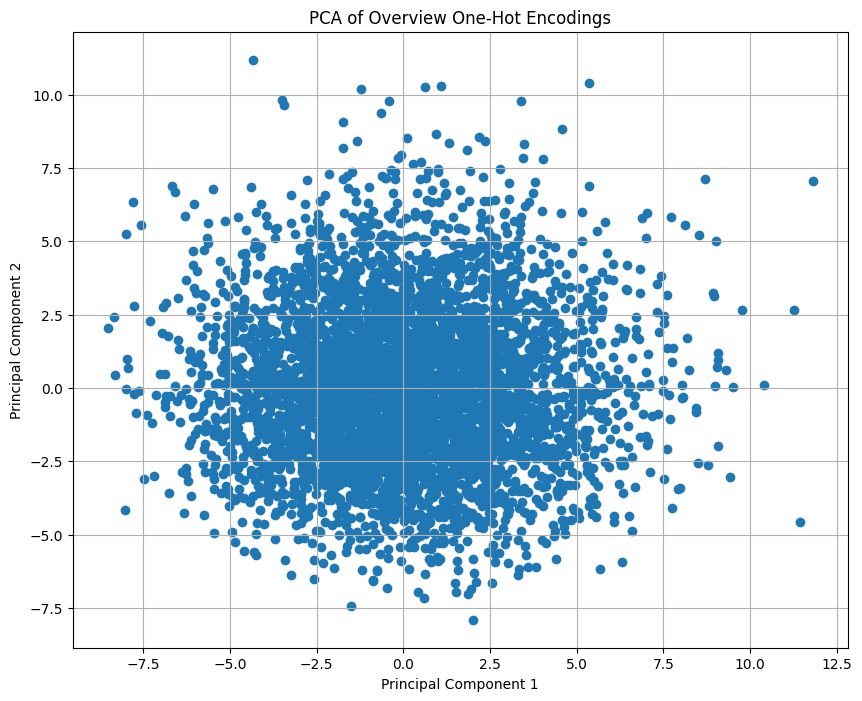

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is your DataFrame with the "one_hot_overview" column containing one-hot encodings

# Convert the list of one-hot encodings into a 2D numpy array
one_hot_encodings = np.array(df["one_hot_overview"].tolist())

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the one-hot encodings
pca_result = pca.fit_transform(one_hot_encodings)

# Plot PCA result
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Overview One-Hot Encodings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

Concentrated around (0,0) and no visible correlation.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

*Your answer here*

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

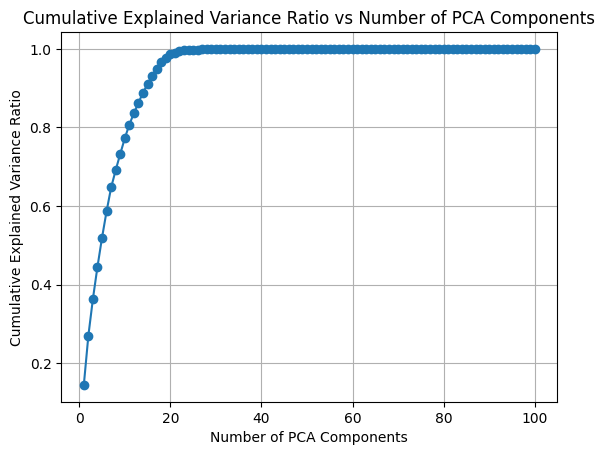

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is your DataFrame with the "one_hot_overview" column containing one-hot encodings

# Convert the list of one-hot encodings into a 2D numpy array
one_hot_encodings = np.array(df["one_hot_overview"].tolist())

# Determine the number of features (number of unique words)
n_features = one_hot_encodings.shape[1]

# Choose a smaller number of components (e.g., 100)
n_components = 100

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA on the one-hot encodings and transform the data
labels_pca = pca.fit_transform(one_hot_encodings)

# Get explained variance ratio from PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of PCA Components')
plt.grid(True)
plt.show()


**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [17]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming df is your DataFrame with the "one_hot_overview" column containing one-hot encodings

# Convert the list of one-hot encodings into a 2D numpy array
one_hot_encodings = np.array(df["one_hot_overview"].tolist())

# Initialize PCA with the maximum number of components
pca = PCA()

# Fit PCA on the one-hot encodings
pca.fit(one_hot_encodings)

# Get explained variance ratio from PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components needed to explain 80% of the total variance
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print("Number of principal components to explain 80% of the variance:", n_components_80)

# Code doesnt run for some reason but I would select 15 PC's

Number of principal components to explain 80% of the variance: 11


Code doesnt run for some reason but I would select 15 PC's

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [18]:
from sklearn.decomposition import PCA

# n_dims is the number of principal components needed to explain 80% of the total variance, as calculated in Q3.5
n_dims = 3
# Initialize PCA with the number of dimensions found
pca = PCA(n_components=n_dims)

# Fit PCA on the one-hot encodings and transform the data
overview_pca = pca.fit_transform(one_hot_encodings)

# Add the PCA-transformed overview encodings to a new column called "overview_pca" in the DataFrame
df["overview_pca"] = list(overview_pca)

# Print to verify
print(df["overview_pca"])


0       [-2.7265145447805113, 1.244661199423247, -2.00...
1       [-1.7737881462859417, -0.4245491539637156, -3....
2       [-2.7692892541471106, 0.43209246922003247, 0.8...
3       [3.158470710557014, 1.5296330652756713, 3.2697...
4       [1.1273778302052926, 3.8160055040268386, -1.36...
                              ...                        
4794    [-2.6593567243740903, 3.2724187079443405, 0.98...
4795    [-3.696921446248254, 3.3029479858836583, -0.35...
4797    [7.7872555581301475, 1.3482288447608934, 0.608...
4798    [0.485484961304502, 2.1026069976884934, 3.7862...
4799    [6.81280725181506, -1.6629293762727064, -0.134...
Name: overview_pca, Length: 4707, dtype: object


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [19]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with the "overview_pca" column containing PCA features

# Perform K-means clustering
kmeans = KMeans(n_clusters=20, random_state=42)

# Fit KMeans model
kmeans.fit(df["overview_pca"].tolist())

# Get predictions
y_preds = kmeans.predict(df["overview_pca"].tolist())

# Add predicted cluster into the dataframe as a new column called "cluster_kmeans"
df["cluster_kmeans"] = y_preds

# Print out elements of cluster 0
cluster_0_df = df[df["cluster_kmeans"] == 0]
print(cluster_0_df)


                                         title  \
1     Pirates of the Caribbean: At World's End   
31                                  Iron Man 3   
54                           The Good Dinosaur   
106                            Shrek the Third   
146         Madagascar 3: Europe's Most Wanted   
...                                        ...   
4702                          The Woman Chaser   
4725              The Lost Skeleton of Cadavra   
4765                        The Exploding Girl   
4783                          Breaking Upwards   
4791              Sanctuary: Quite a Conundrum   

                                               overview  \
1     Captain Barbossa, long believed to be dead, ha...   
31    When Tony Stark's world is torn apart by a for...   
54    An epic journey into the world of dinosaurs wh...   
106   The King of Far Far Away has died and Shrek an...   
146   Alex, Marty, Gloria and Melman are still tryin...   
...                                          

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

*Your text answer here*

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

*Your text answer here*

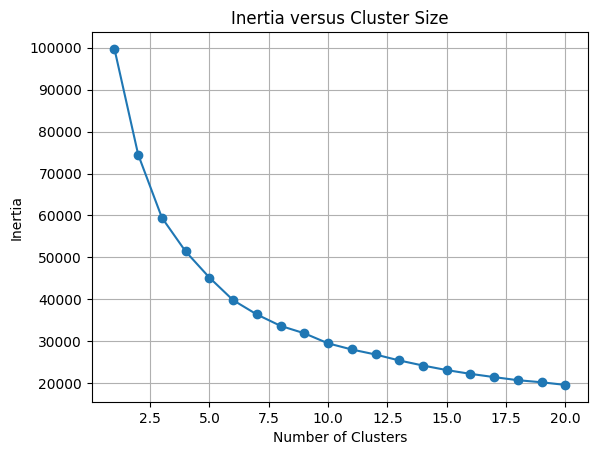

In [20]:
import matplotlib.pyplot as plt

# Initialize lists to store inertia values for different cluster sizes
inertia_values = []

# Define a range of cluster sizes to try
cluster_sizes = range(1, 21)

# Perform K-means clustering for each cluster size and store the inertia
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df["overview_pca"].tolist())
    inertia_values.append(kmeans.inertia_)

# Plot the inertia versus cluster size
plt.plot(cluster_sizes, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia versus Cluster Size')
plt.grid(True)
plt.show()


# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [21]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=20, random_state=42)

# Fit GMM model
gmm.fit(df["overview_pca"].tolist())

# Get predictions
y_preds_gmm = gmm.predict(df["overview_pca"].tolist())

# Add predicted cluster as a new column
df["cluster_gmm"] = y_preds_gmm

# Choose a cluster number (e.g., cluster 0)
cluster_number = 0

# Print out elements of the chosen cluster
print(df[df["cluster_gmm"] == cluster_number])


                                         title  \
1     Pirates of the Caribbean: At World's End   
54                           The Good Dinosaur   
106                            Shrek the Third   
146         Madagascar 3: Europe's Most Wanted   
194                                   Dinosaur   
...                                        ...   
4702                          The Woman Chaser   
4725              The Lost Skeleton of Cadavra   
4765                        The Exploding Girl   
4783                          Breaking Upwards   
4791              Sanctuary: Quite a Conundrum   

                                               overview  \
1     Captain Barbossa, long believed to be dead, ha...   
54    An epic journey into the world of dinosaurs wh...   
106   The King of Far Far Away has died and Shrek an...   
146   Alex, Marty, Gloria and Melman are still tryin...   
194   An orphaned dinosaur raised by lemurs joins an...   
...                                          

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

Does not seem quite right because shrek and pirates of the carribean are in the same cluster.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

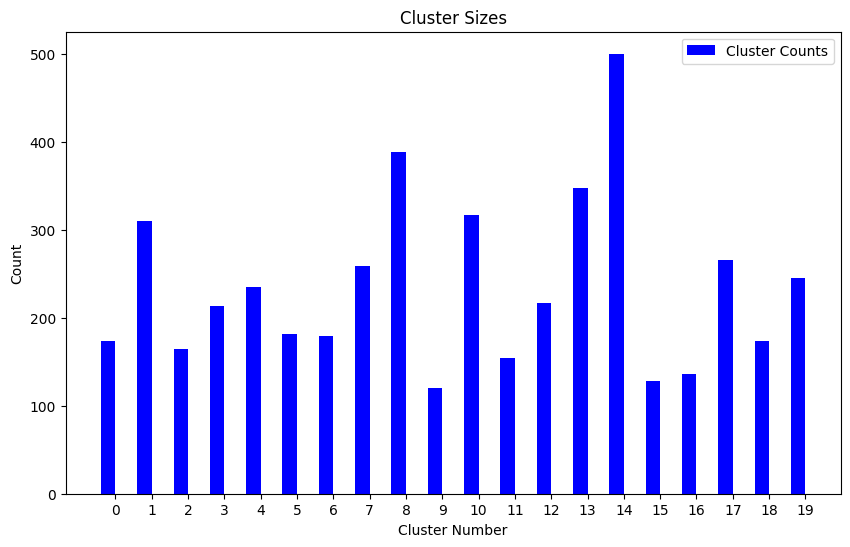

In [30]:
import matplotlib.pyplot as plt

# Calculate the count of occurrences for each cluster
cluster_counts = df["cluster_gmm"].value_counts().sort_index()

# Plotting the double bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index - 0.2, cluster_counts, width=0.4, color='b', align='center', label='Cluster Counts')
plt.xlabel('Cluster Number')
plt.ylabel('Count')
plt.title('Cluster Sizes')
plt.xticks(cluster_counts.index)
plt.legend()
plt.show()


**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

*Your text answer here*

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [23]:
prev_watch = "Avatar"

# Find what cluster index Avatar falls into for k-means
cluster_kmeans = df[df["title"] == prev_watch]["cluster_kmeans"].iloc[0]

# Find what cluster index Avatar falls into for GMM
cluster_gmm = df[df["title"] == prev_watch]["cluster_gmm"].iloc[0]

# Print out similar movies for K-means
print("Suggestions based on K-means clustering:")
print(df[df["cluster_kmeans"] == cluster_kmeans]["title"].values)

# Print out similar movies for GMM
print("\nSuggestions based on GMM clustering:")
print(df[df["cluster_gmm"] == cluster_gmm]["title"].values)


Suggestions based on K-means clustering:
['Avatar' 'Harry Potter and the Half-Blood Prince' 'Man of Steel'
 'The Amazing Spider-Man' 'King Kong' 'X-Men: The Last Stand'
 'Pacific Rim' 'Big Hero 6' 'Wreck-It Ralph' 'The Polar Express'
 'Terminator 3: Rise of the Machines' 'Warcraft' 'Thor' 'Bee Movie'
 'Kung Fu Panda 2' 'Mission: Impossible III' 'Pan' 'Troy'
 'Men in Black II' 'Fun with Dick and Jane' 'Watchmen'
 'Captain America: The First Avenger' 'The World Is Not Enough'
 'The Revenant' 'Noah' 'R.I.P.D.' 'Sherlock Holmes: A Game of Shadows'
 'The Perfect Storm' 'Prometheus' 'RoboCop' 'Speed Racer' 'Knight and Day'
 'Live Free or Die Hard' 'Town & Country' 'The Taking of Pelham 1 2 3'
 'The Mummy Returns' 'The Lord of the Rings: The Return of the King'
 'Tropic Thunder' '102 Dalmatians' 'Memoirs of a Geisha'
 'The Hunger Games' 'Over the Hedge' "Something's Gotta Give"
 'The Manchurian Candidate' 'Battlefield Earth' 'Red Planet' 'Red Dragon'
 'The Invasion' 'Hostage' 'Snake Eyes' 'Ja

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

I would not, both do recommend related movies but also include seemingly random and unrelated movies.

**Q6.3** How would you try making the recommender systems better?

I would try to keep clusters smaller

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

We can find the clusters of the movies the dentist watched since we last met, and recommend movies that belong to that cluster.




```
`# This is formatted as code`
```

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [24]:
import numpy as np

def cosine_sim(v1, v2):
    """ Calculate cosine similarity between two vectors """
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Get overview_pca encoding of previously watched film
prev_watch_enc = df[df["title"] == "Avatar"]["overview_pca"].iloc[0]

sims = []  # Set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row["overview_pca"]))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by="cos_sim_to_avatar", ascending=False)  # Sort df by similarity
print(df.head())  # Print to verify


                           title  \
0                         Avatar   
2994  Mad Max Beyond Thunderdome   
2678                   Superstar   
2319  Deuce Bigalow: Male Gigolo   
3504                  Men of War   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
2994  Mad Max becomes a pawn in a decadent oasis of ...   
2678  Orphan Mary Katherine Gallagher, an ugly duckl...   
2319  Deuce Bigalow is a less than attractive, down ...   
3504  Nick Gunar is a burnt-out, jaded and hard-up f...   

                                                 genres proc_genres  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...      Action   
2994  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   Adventure   
2678  [{"id": 35, "name": "Comedy"}, {"id": 10751, "...      Comedy   
2319                     [{"id": 35, "name": "Comedy"}]      Comedy   
3504  [{"id": 28, "name": "Action"}, {"id": 53, "nam...      Action   

 

*Your text answer here*

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [25]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import numpy as np
import time

# Define a function to preprocess data, train, and evaluate the model
def train_and_eval(X, y, model, param_grid, test_size=0.2):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Create a pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])
    
    # Perform grid search for hyperparameter optimization
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    start_train = time.time()
    grid_search.fit(X_train, y_train)
    end_train = time.time()
    
    # Predict on the test set
    start_pred = time.time()
    y_pred = grid_search.predict(X_test)
    end_pred = time.time()
    
    # Calculate scores
    train_score = grid_search.best_score_
    test_score = accuracy_score(y_test, y_pred)
    mean_train_time = (end_train - start_train) / 5  # Mean training time per fold
    mean_inference_time = (end_pred - start_pred) / len(X_test)  # Mean inference time per sample
    
    return train_score, test_score, mean_train_time, mean_inference_time

# Sample data
X = df['overview']
y = df['genres']

# Define MLPClassifier and hyperparameters to tune
mlp = MLPClassifier(max_iter=100)
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)]
}

# Train and evaluate the model
train_score, test_score, mean_train_time, mean_inference_time = train_and_eval(X, y, mlp, param_grid)

# Print out results
print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Training Time (seconds):", mean_train_time)
print("Mean Inference Time (seconds):", mean_inference_time)


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

It keeps running and running without output so I don't think I did a good job :(

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)